**Dividing Data Into Training and Testing**

<ipython-input-5-16824e08ebd7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'Log_{col}'] = np.log(train_data[col]+1)
<ipython-input-5-16824e08ebd7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'Log_{col}'] = np.log(test_data[col]+1)
<ipython-input-5-16824e08ebd7>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Model for Quantity:
R-squared: 0.9535
Adjusted R-squared: 0.9517
RMSE: 130004.5777

AIC is: -40.12988654433279
BIC is: -37.53821281232413


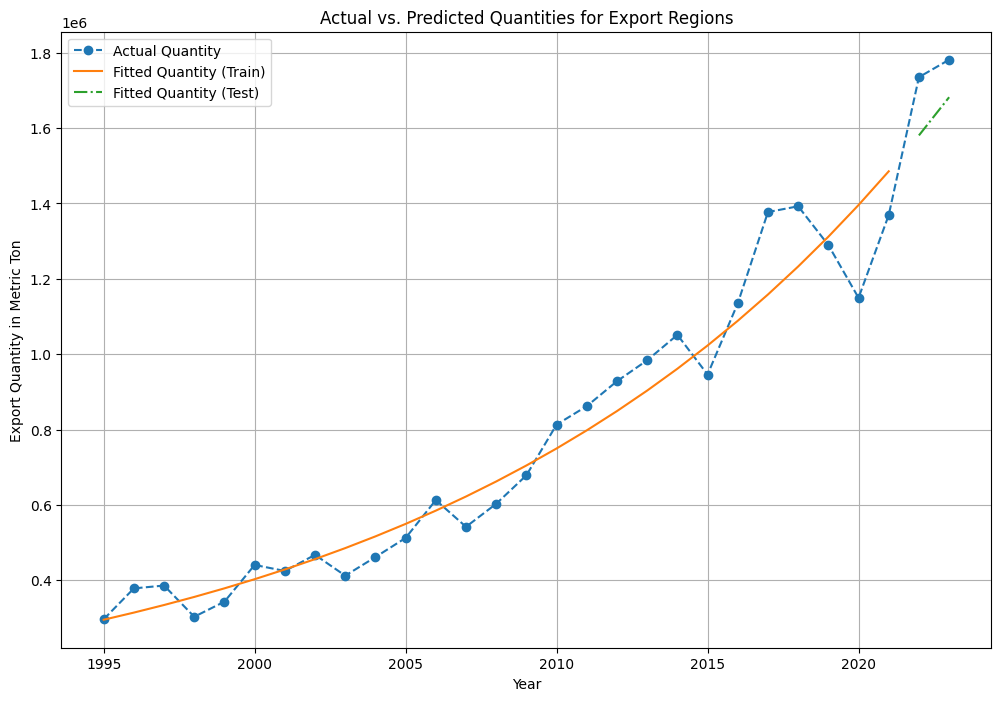

      Forecast_Quantity
Item                   
2022          1,580,698
2023          1,682,079


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:,.0f}'.format
years = np.arange(1995, 2024)
data={
    'Item':[0]*29,
    'Quantity':[296277, 378199, 385818, 302934, 343031, 440473, 424470, 467297, 412017, 461329, 512164, 612641, 541701, 602835, 678436, 813091, 862021, 928215, 983756, 1051243, 945892, 1134948, 1377244, 1392559, 1289651, 1149510, 1369264, 1735286, 1781602]
}

data = pd.DataFrame(data)
data['Item'] = years
data['Item'] = data['Item'].astype(int)

train_size = 27
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

forecast_years = np.arange(2022,2024)
forecast_data = pd.DataFrame({'Item': forecast_years})

for col in ['Quantity']:

    train_data[f'Log_{col}'] = np.log(train_data[col]+1)
    test_data[f'Log_{col}'] = np.log(test_data[col]+1)
    X_train = sm.add_constant(train_data['Item'])
    y_train = train_data[f'Log_{col}']
    model = sm.OLS(y_train, X_train).fit()

    train_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(train_data['Item'])))-1
    test_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(test_data['Item'])) )-1
    r_squared = model.rsquared
    n=len(train_data)
    p=1
    rmse = np.sqrt(mean_squared_error(test_data[col], test_data[f'Fitted_{col}']))
    adjusted_rsquared=1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
    print(f'Model for {col}:')
    print(f'R-squared: {r_squared:.4f}')
    print(f'Adjusted R-squared: {adjusted_rsquared:.4f}')
    print(f'RMSE: {rmse:.4f}\n')
    print("AIC is:",model.aic)
    print("BIC is:",model.bic)
    forecast_data[f'Forecast_{col}'] = model.predict(sm.add_constant(forecast_data['Item']))
    forecast_data[f'Forecast_{col}'] = np.exp(forecast_data[f'Forecast_{col}'])-1

plt.figure(figsize=(12, 8))

for col in ['Quantity']:
    plt.plot(data['Item'], data[col], label=f'Actual {col}', marker='o', linestyle='--')
    plt.plot(train_data['Item'], train_data[f'Fitted_{col}'], label=f'Fitted {col} (Train)', linestyle='-')
    plt.plot(test_data['Item'], test_data[f'Fitted_{col}'], label=f'Fitted {col} (Test)', linestyle='-.')

plt.title('Actual vs. Predicted Quantities for Export Regions')
plt.xlabel('Year')
plt.ylabel('Export Quantity in Metric Ton')
plt.legend()
plt.grid(True)
plt.show()
forecast_data.set_index('Item', inplace=True)
print(forecast_data)

**Using the Entire Data for Training and Testing**

<ipython-input-6-a6e9c8c72116>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'Log_{col}'] = np.log(train_data[col]+1)
<ipython-input-6-a6e9c8c72116>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(train_data['Item'])))-1


Model for Quantity:
R-squared: 0.9623
Adjusted R-squared: 0.9609
RMSE: 91661.4306

AIC is: -44.61663172672408
BIC is: -41.88204006675113


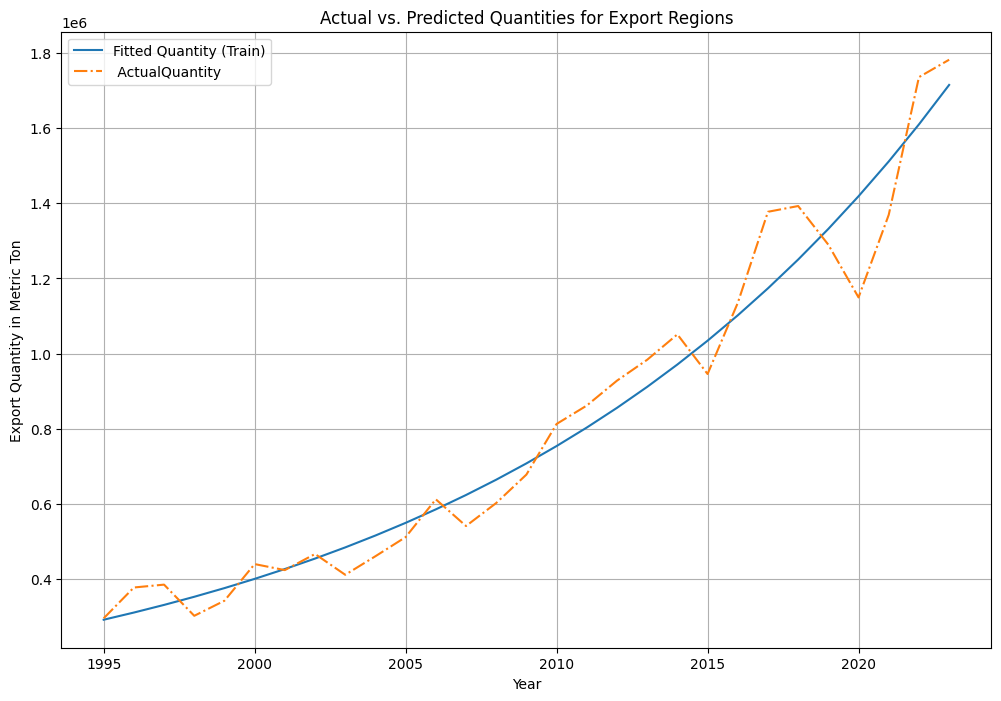

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pickle
pd.options.display.float_format = '{:,.0f}'.format
years = np.arange(1995, 2024)
data={
    'Item':[0]*29,
    'Quantity':[296277, 378199, 385818, 302934, 343031, 440473, 424470, 467297, 412017, 461329, 512164, 612641, 541701, 602835, 678436, 813091, 862021, 928215, 983756, 1051243, 945892, 1134948, 1377244, 1392559, 1289651, 1149510, 1369264, 1735286, 1781602]
}

data = pd.DataFrame(data)
data['Item'] = years
data['Item'] = data['Item'].astype(int)

train_size = 29
train_data = data.iloc[:train_size]

for col in ['Quantity']:

    train_data[f'Log_{col}'] = np.log(train_data[col]+1)
    X_train = sm.add_constant(train_data['Item'])
    y_train = train_data[f'Log_{col}']
    model = sm.OLS(y_train, X_train).fit()

    train_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(train_data['Item'])))-1
    r_squared = model.rsquared
    n=len(train_data)
    p=1
    rmse = np.sqrt(mean_squared_error(train_data[col], train_data[f'Fitted_{col}']))
    adjusted_rsquared=1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
    print(f'Model for {col}:')
    print(f'R-squared: {r_squared:.4f}')
    print(f'Adjusted R-squared: {adjusted_rsquared:.4f}')
    print(f'RMSE: {rmse:.4f}\n')
    print("AIC is:",model.aic)
    print("BIC is:",model.bic)


plt.figure(figsize=(12, 8))

for col in ['Quantity']:
    plt.plot(train_data['Item'], train_data[f'Fitted_{col}'], label=f'Fitted {col} (Train)', linestyle='-')
    plt.plot(train_data['Item'], train_data[f'{col}'], label=f' Actual{col}', linestyle='-.')

plt.title('Actual vs. Predicted Quantities for Export Regions')
plt.xlabel('Year')
plt.ylabel('Export Quantity in Metric Ton')
plt.legend()
plt.grid(True)
plt.show()
with open('linear_regression_model.pkl', 'wb') as file:
  pickle.dump(model, file)


**Function to be used for Deployment**

In [7]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.options.display.float_format = '{:,.0f}'.format
def prediction(x):
  if(x<2025 or x>2030):
    return " Please stick to the range"
  with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
  forecast_data = pd.DataFrame({'Item': np.arange(2024, x+1)})
  forecast_const = sm.add_constant(forecast_data['Item'])
  forecast_data['Quantity'] = np.exp(loaded_model.predict(forecast_const)) - 1
  print("Predictions using loaded model in Metric Ton:")
  print(forecast_data)
  years = np.arange(1995, 2024)
  data = pd.DataFrame({
     'Item': years,
     'Quantity': [296277, 378199, 385818, 302934, 343031, 440473, 424470, 467297, 412017, 461329, 512164, 612641, 541701, 602835, 678436, 813091, 862021, 928215, 983756, 1051243, 945892, 1134948, 1377244, 1392559, 1289651, 1149510, 1369264, 1735286, 1781602]
})
  plt.plot(data['Item'],data['Quantity'],marker="o",linestyle="--",label="Trend from 1995 to 2023")
  plt.plot(forecast_data['Item'],forecast_data['Quantity'],linestyle="-",label="Forecast Quantity from 2024 till {}".format(x))
  plt.title('Actual vs. Predicted Quantity for Export Regions')
  plt.xlim(1995,2030)
  plt.xlabel('Year')
  plt.ylabel('Export Quantity in Metric Ton')
  plt.legend()
  plt.show()

Enter a year in the range 2025-2030:2025
Predictions using loaded model in Metric Ton:
   Item  Quantity
0  2024 1,826,321
1  2025 1,945,388


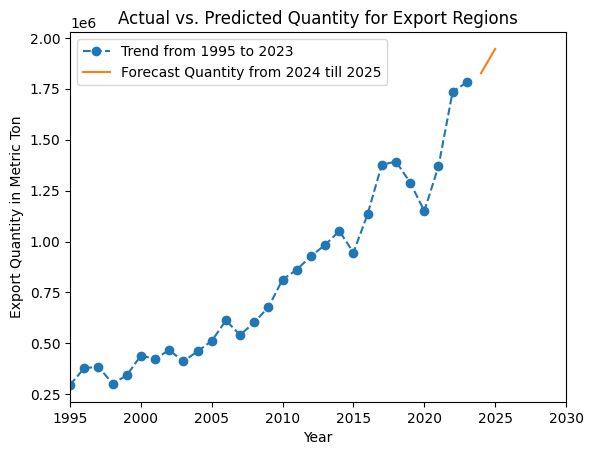

In [8]:
x=int(input("Enter a year in the range 2025-2030:"))
prediction(x)